# Multispectral image recovery

Simple example of subsampled dynamic-foreground/static-background video seperation.


In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import cv2

from nopt.transforms import *
from nopt.constraints import *
from nopt.problems import *
from nopt.solvers import *

import spectral

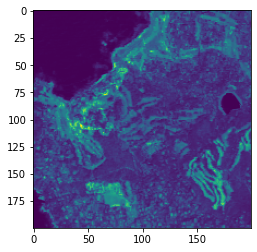

In [2]:
path = '/home/vary/datasets/aviris/flights/f130410t01p00r09_refl/f130410t01p00r09rdn_refl_img_corr.hdr'
image = spectral.open_image(path)
arr = image.load()
arr = arr[800:1000,400:600,:]
plt.imshow(arr[:,:,145])

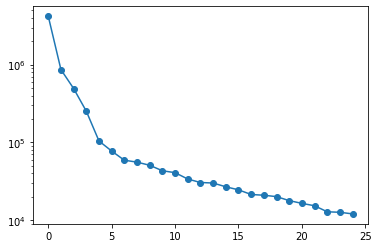

In [3]:
m = np.prod(arr.shape[:2])
n = arr.shape[2]
arr_mat = arr.reshape(m,n)
u, s, vh = np.linalg.svd(arr_mat,full_matrices = False)
plt.semilogy(s[:25], '-o')

In [13]:
delta = 0.5
r = 5
p = round(delta * m*n) # number of samples

mask = np.random.choice(m*n,p,replace = False)
P_omega = EntryWise((p,m*n), mask)
HTr = FixedRank(r, (m,n))

b = P_omega.matvec(arr_mat.flatten())
b = b/np.linalg.norm(b)

sub, x_true = HTr.project(arr_mat.flatten())
problem = LinearProblem(P_omega, b, HTr, x_true = x_true)
solver = NIHT(logverbosity = 2, maxiter = 100, verbosity = 2, minreldecrease = 1e-5)

In [14]:
x, opt_log = solver.solve(problem)

 iter		   obj. value	    grad. norm	     xdist
    1	+6.2349601945991878e-03	4.93381780e-01
    2	+2.0878679989696294e-03	1.11668798e-01
    3	+2.2810030185342273e-03	6.46199350e-02
    4	+1.3943088840584815e-03	6.75426239e-02
    5	+2.1010023402596046e-03	5.28073647e-02
    6	+1.4046875236172634e-03	6.48228716e-02
    7	+2.1036952218988539e-03	5.30035381e-02
    8	+1.4106673570869440e-03	6.48644004e-02
    9	+2.1036464272921455e-03	5.31162378e-02
   10	+1.4127447309235856e-03	6.48636482e-02
   11	+2.1003201133255743e-03	5.31553333e-02
   12	+1.4163177621874785e-03	6.48123463e-02
   13	+2.0960499475494885e-03	5.32225096e-02
   14	+1.4230974773225108e-03	6.47464277e-02
   15	+2.0911012332493666e-03	5.33497418e-02
   16	+1.4355767939368664e-03	6.46699503e-02
Terminated - min relative decrease reached after 16 iterations, 14.99 seconds.



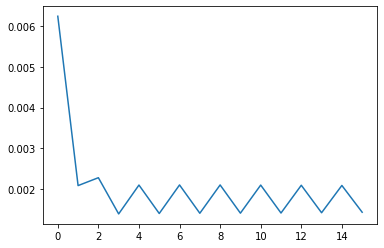

In [15]:
plt.plot(opt_log['iterations']['fx'])

In [16]:
x_cube=x.reshape(arr.shape)

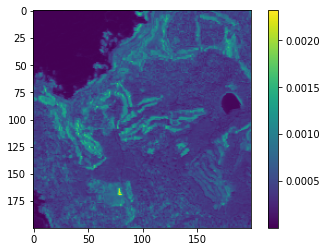

In [17]:
plt.imshow(x_cube[:,:,40])
plt.colorbar()

In [12]:
plt.imshow(S[50,:,:,:])

NameError: name 'S' is not defined